This notebook aims to merge the complete socio-economic dataset with the historical context dataset:

Imports:

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import math

Upload historical context with the intention to create a dataframe containing information by year

In [6]:
df_hc = pd.read_csv('Desktop/OMDENA_FINAL_DATASETS/historical_merged_dataset.csv')

In [8]:
df_hc = df_hc.drop(columns= 'Unnamed: 0')

In [10]:
df_hc.shape

(3822, 4)

In [13]:
df_hc.head()

,year,where_coordinates,total_deaths,GDP Deflator Value
0,1989,Rumbek town,12.0,51.551934
1,1989,Kadugli town,61.0,51.551934
2,1989,Kajo Kaji town,1.0,51.551934
3,1989,Kurmuk town,2.0,51.551934
4,1989,Road between towns of Juba and Yei,0.0,51.551934


In [19]:
df_hc_sub = df_hc[['year','total_deaths']]

In [21]:
df_hc_sub.head()

,year,total_deaths
0,1989,12.0
1,1989,61.0
2,1989,1.0
3,1989,2.0
4,1989,0.0


In [23]:
df_hc_sum = df_hc_sub.groupby('year').sum()

In [25]:
df_hc_sum

,total_deaths
year,
1989,5512.0
1990,425.0
1991,2471.0
1992,3437.0
1993,3751.0
1994,496.0
1995,671.0
1996,673.0
1997,4126.0


Upload Demographic dataset

In [28]:
df_de = pd.read_csv('Desktop/OMDENA_FINAL_DATASETS/Final Demographics.csv')

In [30]:
df_de.shape

(5044, 86)

In [32]:
df_de.head()

,Country,Location code,ISO3 Alpha-code,ISO2 Alpha-code,Type,Parent code,indicator,gender,quintile,ages,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Sudan,729,SDN,SD,Country/Area,912,Administration of a nationally representative...,unknown,9,NaN,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,Sudan,729,SDN,SD,Country/Area,912,Administration of a nationally representative...,unknown,9,NaN,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,Sudan,729,SDN,SD,Country/Area,912,Administration of a nationally-representative...,unknown,9,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sudan,729,SDN,SD,Country/Area,912,Administration of a nationally-representative...,unknown,9,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sudan,729,SDN,SD,Country/Area,912,Administration of a nationally-representative...,unknown,9,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Convert from wide to long - Faraaz

In [36]:
id_vars = ['Country', 'indicator', 'ages', 'gender', 'quintile', 'values are in percentage', 'non-zero-year-columns']
df_long = pd.melt(df_de, id_vars=id_vars, var_name='Year', value_name='Value')
# Convert 'Year' to integer
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
df_long.head()

,Country,indicator,ages,gender,quintile,values are in percentage,non-zero-year-columns,Year,Value
0,Sudan,Administration of a nationally representative...,NaN,unknown,9,False,5,NaN,729
1,Sudan,Administration of a nationally representative...,NaN,unknown,9,False,5,NaN,729
2,Sudan,Administration of a nationally-representative...,NaN,unknown,9,False,0,NaN,729
3,Sudan,Administration of a nationally-representative...,NaN,unknown,9,False,0,NaN,729
4,Sudan,Administration of a nationally-representative...,NaN,unknown,9,False,0,NaN,729


Extract list of indicators discuss in the EDA's done

In [41]:
indicators = ['Rural population','Urban population','Labor force, female','Labor force, total','Access to anti-retroviral drugs, female (%)',
              'Access to anti-retroviral drugs, male (%)', 'Inequality in life expectancy','Life expectancy at birth, female (years)'
             'Life expectancy at birth, male (years)', 'ARI treatment (% of children under 5 taken to a health provider)',
             'Immunization, DPT (% of children ages 12-23 months)', 'Immunization, HepB3 (% of one-year-old children)',
             'Immunization, measles (% of children ages 12-23 months)', 'Immunization, measles second dose (% of children by the nationally recommended age)',
             'Agriculture, forestry, and fishing, value added (% of GDP)', 'Mobile cellular subscriptions (per 100 people)',
            'Mobile and fixed-line telephone subscribers (per 100 people)', 'Internally displaced persons, total displaced by conflict and violence (number of people)',
            'Political Stability and Absence of Violence/Terrorism: Estimate', 'Tuberculosis treatment success rate (% of new cases)',
            'Incidence of tuberculosis (per 100,000 people)',
            'Incidence of malaria (per 1,000 population at risk)',
            'People using at least basic drinking water services (% of population)',
            'People using at least basic sanitation services (% of population)',
            'People with basic handwashing facilities including soap and water (% of population)',
            'People practicing open defecation (% of population)' 'Tuberculosis treatment success rate (% of new cases)',
            'Incidence of tuberculosis (per 100,000 people)',
            'Incidence of malaria (per 1,000 population at risk)',
            'Current health expenditure (% of GDP)',
            'Domestic general government health expenditure (% of GDP)',
            'Domestic private health expenditure (% of current health expenditure)',
            'Domestic general government health expenditure (% of current health expenditure)',
            'Military expenditure (% of GDP)',
            'Political Stability and Absence of Violence/Terrorism: Percentile Rank',
             'Tuberculosis treatment success rate (% of new cases)',
            'Incidence of tuberculosis (per 100,000 people)',
            'Incidence of malaria (per 1,000 population at risk)',
            'Urban population (% of total population)',
            'Rural population (% of total population)',
            'Migration_Net Number of Migrants (thousands)',
            'Internally displaced persons, new displacement associated with conflict and violence (number of cases)',
            'Internally displaced persons, new displacement associated with disasters (number of cases)']

In [45]:
print (len(indicators))

41


In [51]:
df_sub = df_long[df_long['indicator'].isin(indicators)]

In [55]:
df_sub = df_sub.reset_index(drop=True)

In [57]:
df_sub.head()

,Country,indicator,ages,gender,quintile,values are in percentage,non-zero-year-columns,Year,Value
0,Sudan,ARI treatment (% of children under 5 taken to ...,NaN,unknown,9,True,2,NaN,729
1,Sudan,"Access to anti-retroviral drugs, female (%)",NaN,female,9,True,15,NaN,729
2,Sudan,"Access to anti-retroviral drugs, male (%)",NaN,male,9,True,15,NaN,729
3,Sudan,"Agriculture, forestry, and fishing, value adde...",NaN,unknown,9,True,64,NaN,729
4,Sudan,Current health expenditure (% of GDP),NaN,unknown,9,True,22,NaN,729


In [61]:
df_sub.shape

(2686, 9)

Select for data that we can build time series for, so at least 15 years of data, and importantly, the indcidence of malaria and tuberculosis must be in the dataframe

In [86]:
df_time = df_sub[df_sub['non-zero-year-columns'] >= 15]

In [88]:
df_time['indicator'].unique()

array(['Access to anti-retroviral drugs, female (%)',
       'Access to anti-retroviral drugs, male (%)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Current health expenditure (% of GDP)',
       'Domestic general government health expenditure (% of GDP)',
       'Domestic general government health expenditure (% of current health expenditure)',
       'Domestic private health expenditure (% of current health expenditure)',
       'Immunization, DPT (% of children ages 12-23 months)',
       'Immunization, HepB3 (% of one-year-old children)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Incidence of malaria (per 1,000 population at risk)',
       'Incidence of tuberculosis (per 100,000 people)',
       'Internally displaced persons, new displacement associated with conflict and violence (number of cases)',
       'Internally displaced persons, new displacement associated with disasters (number of cases)',
       'Internally

In [151]:
df_time = df_time.reset_index(drop=True)

In [236]:
df_time.head()

,Country,indicator,ages,gender,quintile,values are in percentage,non-zero-year-columns,Year,Value
0,Sudan,"Access to anti-retroviral drugs, female (%)",NaN,female,9,True,15,NaN,729
1,Sudan,"Access to anti-retroviral drugs, male (%)",NaN,male,9,True,15,NaN,729
2,Sudan,"Agriculture, forestry, and fishing, value adde...",NaN,unknown,9,True,64,NaN,729
3,Sudan,Current health expenditure (% of GDP),NaN,unknown,9,True,22,NaN,729
4,Sudan,Domestic general government health expenditure...,NaN,unknown,9,True,22,NaN,729


In [107]:
group = df_time.groupby(['indicator','Year'])

In [109]:
group.head()

,Country,indicator,ages,gender,quintile,values are in percentage,non-zero-year-columns,Year,Value
171,Sudan,"Access to anti-retroviral drugs, female (%)",NaN,female,9,True,15,1950.0,0.0
172,Sudan,"Access to anti-retroviral drugs, male (%)",NaN,male,9,True,15,1950.0,0.0
173,Sudan,"Agriculture, forestry, and fishing, value adde...",NaN,unknown,9,True,64,1950.0,0.0
174,Sudan,Current health expenditure (% of GDP),NaN,unknown,9,True,22,1950.0,0.0
175,Sudan,Domestic general government health expenditure...,NaN,unknown,9,True,22,1950.0,0.0
...,...,...,...,...,...,...,...,...,...
2681,Sudan,Rural population,NaN,unknown,9,False,64,2023.0,31856240.0
2682,Sudan,Rural population (% of total population),NaN,unknown,9,True,64,2023.0,63.658
2683,Sudan,Tuberculosis treatment success rate (% of new ...,NaN,unknown,9,True,23,2023.0,0.0
2684,Sudan,Urban population,NaN,unknown,9,False,64,2023.0,18186551.0


Must extract indicator as the variables, year as the index, and value as the value per year

Variables

In [119]:
updated_indicator_list= list(df_time.columns)

Let's create a dictionary within a dictionary: the first contains indicator as the key, and that value has a dictionary of years to value


In [200]:
def unpacking(df, indicator, year, value):

    df_len = len(df)

    #create a dictionary containing indicator: value, which will be aligned with the years
    
    value_dict =defaultdict(list)

    for x in range(df_len):
        
        value_dict[df.loc[x, indicator]].append(df.loc[x, value])

    return year_dict, value_dict

    

    

In [226]:
def year_extract(df, year):

    year_unique = []

    for x in range(len(df)):

        year_unique.append(df.loc[x, year])

    year_unique = [x for x in year_unique if not math.isnan(x)]

    year_unique = list(set(year_unique))




    return year_unique

In [188]:
unpacked = unpacking(df_time, 'indicator', 'Year', 'Value')

In [228]:
years = year_extract(df_time, 'Year')

In [230]:
print (years)

[1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0]


In [243]:
indic_df = pd.DataFrame(data=unpacked[1])

In [245]:
indic_df.head(10)

,"Access to anti-retroviral drugs, female (%)","Access to anti-retroviral drugs, male (%)","Agriculture, forestry, and fishing, value added (% of GDP)",Current health expenditure (% of GDP),Domestic general government health expenditure (% of GDP),Domestic general government health expenditure (% of current health expenditure),Domestic private health expenditure (% of current health expenditure),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)",...,People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),People with basic handwashing facilities including soap and water (% of population),Political Stability and Absence of Violence/Terrorism: Estimate,Political Stability and Absence of Violence/Terrorism: Percentile Rank,Rural population,Rural population (% of total population),Tuberculosis treatment success rate (% of new cases),Urban population,Urban population (% of total population)
0,729,729,729,729,729,729,729,729,729,729,...,729,729,729,729,729,729,729,729,729,729
1,SDN,SDN,SDN,SDN,SDN,SDN,SDN,SDN,SDN,SDN,...,SDN,SDN,SDN,SDN,SDN,SDN,SDN,SDN,SDN,SDN
2,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,...,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD
3,Country/Area,Country/Area,Country/Area,Country/Area,Country/Area,Country/Area,Country/Area,Country/Area,Country/Area,Country/Area,...,Country/Area,Country/Area,Country/Area,Country/Area,Country/Area,Country/Area,Country/Area,Country/Area,Country/Area,Country/Area
4,912,912,912,912,912,912,912,912,912,912,...,912,912,912,912,912,912,912,912,912,912
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
indic_df.shape

(79, 31)

In [240]:
print (len(years))

74


Remove the five arbitrary values in the first five rows, reset the data types, and then add the years as the index or as another field

In [251]:
indic_df= indic_df.drop(index=[0,1,2,3,4])

In [255]:
indic_df = indic_df.reset_index(drop=True)

In [261]:
indic_df.dtypes

Access to anti-retroviral drugs, female (%)                                                               object
Access to anti-retroviral drugs, male (%)                                                                 object
Agriculture, forestry, and fishing, value added (% of GDP)                                                object
Current health expenditure (% of GDP)                                                                     object
Domestic general government health expenditure (% of GDP)                                                 object
Domestic general government health expenditure (% of current health expenditure)                          object
Domestic private health expenditure (% of current health expenditure)                                     object
Immunization, DPT (% of children ages 12-23 months)                                                       object
Immunization, HepB3 (% of one-year-old children)                                                

In [267]:
indic_df = indic_df.astype('int64')

In [271]:
indic_df.dtypes[:10]

Access to anti-retroviral drugs, female (%)                                         int64
Access to anti-retroviral drugs, male (%)                                           int64
Agriculture, forestry, and fishing, value added (% of GDP)                          int64
Current health expenditure (% of GDP)                                               int64
Domestic general government health expenditure (% of GDP)                           int64
Domestic general government health expenditure (% of current health expenditure)    int64
Domestic private health expenditure (% of current health expenditure)               int64
Immunization, DPT (% of children ages 12-23 months)                                 int64
Immunization, HepB3 (% of one-year-old children)                                    int64
Immunization, measles (% of children ages 12-23 months)                             int64
dtype: object

In [287]:
year_ser = pd.Series(years)

In [301]:
final_demo_df = pd.concat([indic_df, year_ser], axis=1)

In [303]:
final_demo_df = final_demo_df.rename(columns={0:'Year'})

In [308]:
final_demo_df.tail()

,"Access to anti-retroviral drugs, female (%)","Access to anti-retroviral drugs, male (%)","Agriculture, forestry, and fishing, value added (% of GDP)",Current health expenditure (% of GDP),Domestic general government health expenditure (% of GDP),Domestic general government health expenditure (% of current health expenditure),Domestic private health expenditure (% of current health expenditure),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)",...,People using at least basic sanitation services (% of population),People with basic handwashing facilities including soap and water (% of population),Political Stability and Absence of Violence/Terrorism: Estimate,Political Stability and Absence of Violence/Terrorism: Percentile Rank,Rural population,Rural population (% of total population),Tuberculosis treatment success rate (% of new cases),Urban population,Urban population (% of total population),Year
69,28,34,20,4,1,22,70,93,93,90,...,36,14,-1,6,29635465,65,83,15912710,34,2019.0
70,31,35,20,3,1,34,58,90,90,86,...,36,12,-1,7,30294623,64,86,16494608,35,2020.0
71,29,30,6,2,0,27,62,84,84,81,...,0,10,-1,5,30958464,64,88,17108460,35,2021.0
72,28,30,5,0,0,0,0,68,68,66,...,0,10,-2,4,31627070,64,66,17756276,35,2022.0
73,0,0,5,0,0,0,0,51,51,51,...,0,0,-2,1,31856240,63,0,18186551,36,2023.0


Check that some graphs from this dataset match the graphs of previous EDA's with this dataset

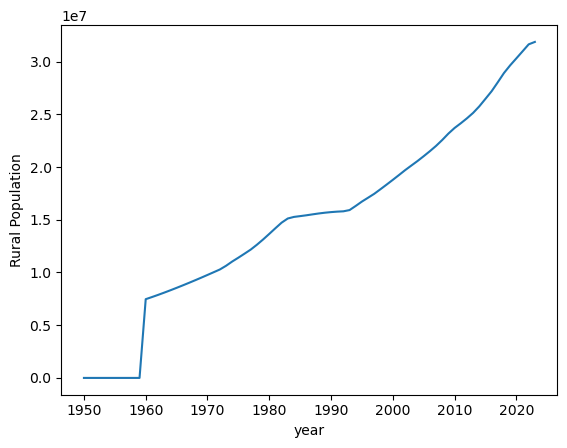

In [315]:
x=final_demo_df['Year']
y=final_demo_df['Rural population']

plt.plot(x, y)
plt.xlabel('year')
plt.ylabel('Rural Population')
plt.show()

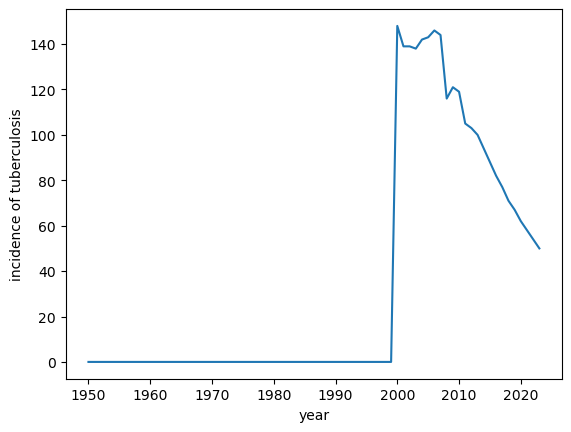

In [322]:
x=final_demo_df['Year']
y=final_demo_df['Incidence of tuberculosis (per 100,000 people)']

plt.plot(x, y)
plt.xlabel('year')
plt.ylabel('incidence of tuberculosis')
plt.show()

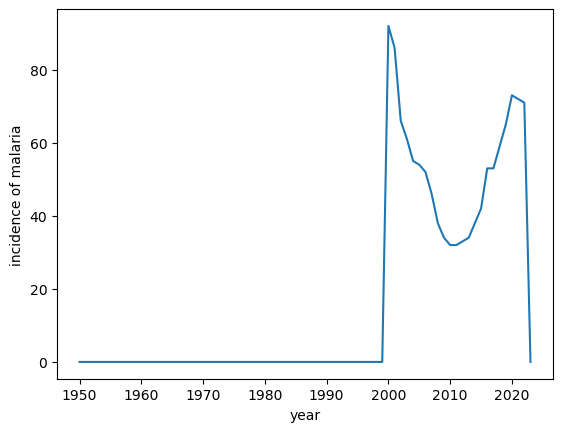

In [328]:
x=final_demo_df['Year']
y=final_demo_df['Incidence of malaria (per 1,000 population at risk)']

plt.plot(x, y)
plt.xlabel('year')
plt.ylabel('incidence of malaria')
plt.show()

Merge the demographics with the historical context

In [331]:
df_hc_sum

,total_deaths
year,
1989,5512.0
1990,425.0
1991,2471.0
1992,3437.0
1993,3751.0
1994,496.0
1995,671.0
1996,673.0
1997,4126.0


In [333]:
merged_final_df = pd.merge(final_demo_df, df_hc_sum, how='left', left_on='Year', right_on='year')

In [337]:
merged_final_df.tail(30)

,"Access to anti-retroviral drugs, female (%)","Access to anti-retroviral drugs, male (%)","Agriculture, forestry, and fishing, value added (% of GDP)",Current health expenditure (% of GDP),Domestic general government health expenditure (% of GDP),Domestic general government health expenditure (% of current health expenditure),Domestic private health expenditure (% of current health expenditure),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)",...,People with basic handwashing facilities including soap and water (% of population),Political Stability and Absence of Violence/Terrorism: Estimate,Political Stability and Absence of Violence/Terrorism: Percentile Rank,Rural population,Rural population (% of total population),Tuberculosis treatment success rate (% of new cases),Urban population,Urban population (% of total population),Year,total_deaths
44,0,0,34,0,0,0,0,46,0,48,...,0,0,0,16306846,67,0,7737102,32,1994.0,496.0
45,0,0,37,0,0,0,0,48,0,51,...,0,0,0,16719818,67,0,7952325,32,1995.0,671.0
46,0,0,42,0,0,0,0,56,0,59,...,0,-2,1,17085782,67,0,8145746,32,1996.0,673.0
47,0,0,45,0,0,0,0,55,0,58,...,0,0,0,17456933,67,0,8342888,32,1997.0,4126.0
48,0,0,44,0,0,0,0,46,0,49,...,0,-2,2,17888929,67,0,8570070,32,1998.0,5462.0
49,0,0,43,0,0,0,0,55,0,51,...,0,0,0,18328900,67,0,8801713,32,1999.0,1644.0
50,0,0,40,3,1,33,66,62,0,58,...,0,-2,1,18777694,67,75,9039051,32,2000.0,3460.0
51,0,0,35,3,1,33,66,66,0,58,...,0,0,0,19235132,67,80,9281638,32,2001.0,3680.0
52,0,0,37,3,1,34,65,60,0,58,...,0,-1,3,19699870,67,78,9528857,32,2002.0,3036.0
53,0,0,38,3,1,32,66,69,0,65,...,0,-1,4,20133784,67,82,9762251,32,2003.0,3919.0


In [339]:
merged_final_df = merged_final_df.rename(columns={'total_deaths':'total_deaths_from_violence'})

In [341]:
merged_final_df.to_csv('final_dataset.csv')